Computer Vision Midterms - Kenny Gilbert Setiawan / 2301898960

For this project, we will use the Python packages : OpenCV, Numpy and Matplotlib.
First we will import the libraries.

In [112]:
#Import Libraries

import cv2 as cv
import numpy as np
from matplotlib import image,pyplot as plt

We will import the image in for Number 1 and 2.

In [113]:
#Import Image

img = cv.imread("Dataset/1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

1. Create a program to apply an image filtering process to the image

For this filtering process, i will use the Bilateral filter.

This filter is similar to Gaussian filter, where nearby pixels are taken as consideration while filtering. But a drawback of the gaussian filter is that it does not consider whether pixels have the same intensity, and it does not consider if a pixel is an edge or not, so the edges get blurred.

This 'edge blurring' is generally undesirable in image filtering, as usually the objective is to get a clearer image. A blurred edge has a detrimental effect, where humans are harder to perceive objects in an image with a blurred edge.

So the bilateral filter adds another gaussian filter which is a function of pixel difference. This function makes sure that not only nearby pixels considered for blurring, but also only pixels that has similar intensities that are considered for blurring. This allows the filter to preserve the edges as it will have a large intensity variation.

To apply the bilateral filter, we will use the OpenCV function 'bilateralfilter()'

The function has 3 parameters, the first integer represents diameter of each pixel neighborhood. We will set this to 9.

The second integer represents sigmacolor, which is the sigma value in the color space, this determines how far apart colors have to be with each other to be mixed, if this number is big, colors far to each other will get mixed. We will set this to 100.

The third integer represents sigmaspace, which is the sigma value in the coordinate space, this determines how far apart pixels have to be with each other to be mixed, if this number is big, pixels far to each other will get mixed, as long as their colors lie within the sigmacolor range. We will set this to 100.

After this we can just use matplotlib to display the results.

Below is the resulting output.

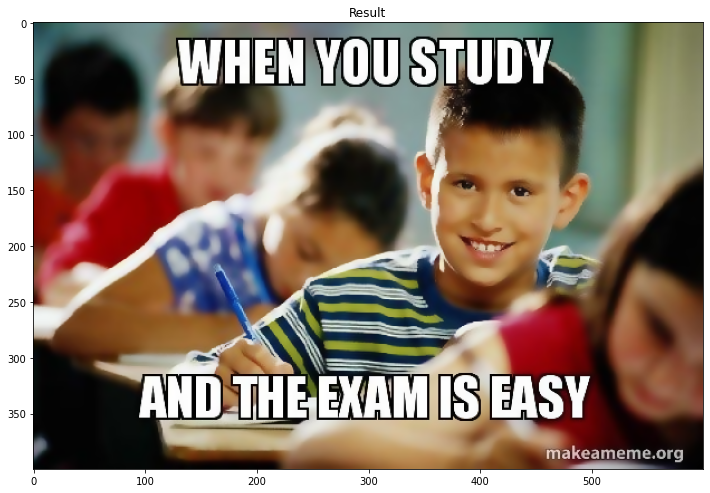

In [114]:
bilateral = cv.bilateralFilter(img,9,100,100)

plt.rcParams["figure.figsize"]=(12,12)
plt.imshow(bilateral)
plt.title('Result')

plt.show()

2. Create a program to apply an affine transformation to the image

Affine Transformation is an image transformation that can be expressed in the form of a matrix multiplication, followed by a vector addition.

In affine transformation, all the parallel lines in the original image will still be parallel in the output image. 

To do the affine transformation we can use the OpenCV method, 'getAffineTransform' and 'warpAffine' methods.

We use the 'getAffineTransform' to gain the transformation matrix from the coordinate of quadrangle vertices in the source image, and where in the destination image we want those quadrangle vertices to be at.

The 'warpAffine' method takes in the input image, the transformation matrix from before, and then produces an output according to the transformation matrix.

Again, we use matplotlib to display the results.

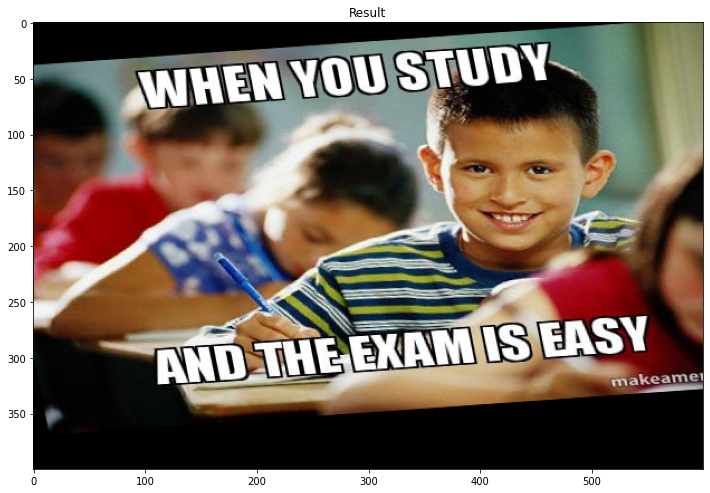

In [115]:
rows, cols, ch = img.shape
  
SourceMatrix = np.float32([[50, 100],
                   [250, 70], 
                   [150, 250]])
  
DestinationMatrix = np.float32([[20, 120],
                   [235, 80], 
                   [155, 235]])

TransformationMatrix = cv.getAffineTransform(SourceMatrix, DestinationMatrix)

destination = cv.warpAffine(img, TransformationMatrix, (cols, rows)) # cv2.warpAffine(src, M, dsize, dst, flags, borderMode, borderValue)

plt.rcParams["figure.figsize"]=(12,12)
plt.imshow(destination)
plt.title('Result')

plt.show()

3. Create a program to match the image in the above link to the image in this
link: 

We will start by importing the images.

In [116]:
inter_image = cv.imread('Dataset/target.jpg')
inter_image = cv.cvtColor(inter_image, cv.COLOR_BGR2RGB)

image1 = cv.imread('Dataset/1.jpg')
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)

To find a matching image, we need a feature descriptor.
Feature Descriptors are algorithms that charactherize the appearance of a keypoint. It distinguishes certain feature from another in an image, allowing us to identify unique parts of an image.

For this problem, i will use the SIFT feature descriptor.


In [117]:
SIFT = cv.xfeatures2d.SIFT_create()

inter_kp_trgt, inter_ds_trgt = SIFT.detectAndCompute(inter_image, None)
inter_kp_img, inter_ds_img = SIFT.detectAndCompute(image1, None)


To match certain areas with the others in the image, we will use FLANN.
FLANN is a library for performing nearest neighbor searches in high dimensional spaces. It will automatically choose the best algorithm and parameters after detecting our dataset.

Later, this is used to be inputted in our matcher method.

In [118]:
KDTREE_INDEX = 1 
TREE_CHECKS = 50

FLANN = cv.FlannBasedMatcher(dict(algorithm = KDTREE_INDEX), dict(checks = TREE_CHECKS))

matcher = FLANN.knnMatch(inter_ds_img, inter_ds_trgt, k = 2)

We can then filter out matches that we desire. I set the accuracy to 0.68.

In [119]:
matches = []

for i in range(len(matcher)):
    matches.append([0,0])

for i, (m, n) in enumerate(matcher):
    if m.distance < 0.68 * n.distance:
        matches[i] = [1,0]

Then we can get the result with using the OpenCV Method 'drawMatchesKnn' which will draw found matches of keypoints from the images. We put in our previous FLANN Matcher result here.

The result will then be displayed with matplotlib.

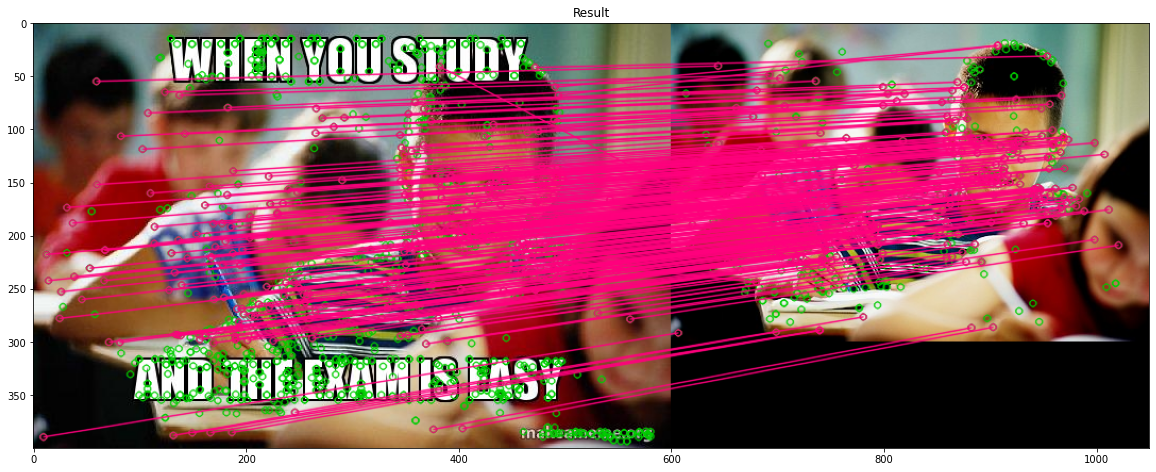

In [120]:
result = cv.drawMatchesKnn(
    image1, inter_kp_img,
    inter_image, inter_kp_trgt,
    matcher, None, matchColor=[255,0,125], singlePointColor=[0,205,0],
    matchesMask=matches
)

plt.rcParams["figure.figsize"]=(20,20)
plt.title("Result")
plt.imshow(result)

plt.show()